–í —Ü—å–æ–º—É –¥–æ–º–∞—à–Ω—å–æ–º—É –∑–∞–≤–¥–∞–Ω–Ω—ñ –º–∏ –∑–Ω–æ–≤—É –ø—Ä–∞—Ü—é—î–º–æ –∑ –¥–∞–Ω–∏–º–∏ –∑ –Ω–∞—à–æ–≥–æ –∑–º–∞–≥–∞–Ω–Ω—è ["Bank Customer Churn Prediction (DLU Course)"](https://www.kaggle.com/t/7c080c5d8ec64364a93cf4e8f880b6a0).

–¢—É—Ç –º–∏ –ø–æ–±—É–¥—É—î–º–æ —Ä—ñ—à–µ–Ω–Ω—è –∑–∞–¥–∞—á—ñ –∫–ª–∞—Å–∏—Ñ—ñ–∫–∞—Ü—ñ—ó –∑ –≤–∏–∫–æ—Ä–∏—Å—Ç–∞–Ω–Ω—è–º kNearestNeighboors, –∑–Ω–∞–π–¥–µ–º–æ –æ–ø—Ç–∏–º–∞–ª—å–Ω—ñ –≥—ñ–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–∏ –¥–ª—è —Ü—å–æ–≥–æ –º–µ—Ç–æ–¥—É —ñ –∑—Ä–æ–±–∏–º–æ –±–∞–∑–æ–≤—ñ –∞–Ω—Å–∞–º–±–ª—ñ. –¶–µ –¥–∞—Å—Ç—å –∑–º–æ–≥—É –ø–æ—Ä—ñ–≤–Ω—è—Ç–∏ –ø–µ—Ä—Ñ–æ—Ä–º–∞–Ω—Å –º–æ–¥–µ–ª—ñ –∑ –ø–æ–ø–µ—Ä–µ–¥–Ω—ñ–º–∏ –≤–∏–≤—á–µ–Ω–∏–º–∏ –º–µ—Ç–æ–¥–∞–º–∏.

0. –ó—á–∏—Ç–∞–π—Ç–µ –¥–∞–Ω—ñ `train.csv` —Ç–∞ –∑—Ä–æ–±—ñ—Ç—å –ø—Ä–µ–ø—Ä–æ—Ü–µ—Å–∏–Ω–≥ –≤–∏–∫–æ—Ä–∏—Å—Ç–æ–≤—É—é—á–∏ –Ω–∞–ø–∏—Å–∞–Ω–∏–π –í–∞–º–∏ —Å–∫—Ä–∏–ø—Ç `process_bank_churn.py` —Ç–∞–∫, –∞–±–∏ –≤ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ñ –æ—Ç—Ä–∏–º–∞—Ç–∏ –¥–∞–Ω—ñ –≤ —Ä–æ–∑–±–∏—Ç—Ç—ñ X_train, train_targets, X_val, val_targets –¥–ª—è –µ–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç—ñ–≤.

  –Ø–∫—â–æ –í–∞–º –Ω–µ –≤–¥–∞–ª–æ—Å—å —Ä–µ–∞–ª—ñ–∑—É–≤–∞—Ç–∏ –≤ –∑–∞–≤–¥–∞–Ω–Ω—ñ `2.3. –î–µ—Ä–µ–≤–∞ –ø—Ä–∏–π–Ω—è—Ç—Ç—è —Ä—ñ—à–µ–Ω—å` —Å–∫—Ä–∏–ø—Ç `process_bank_churn.py` - –º–æ–∂–Ω–∞ —Å–∫–æ—Ä–∏—Å—Ç–∞—Ç–∏—Å—å –≥–æ—Ç–æ–≤–∏–º —Å–∫—Ä–∏–ø—Ç–æ–º –∑ –∑–∞–ø—Ä–æ–ø–æ–Ω–æ–≤–∞–Ω–æ–≥–æ —Ä—ñ—à–µ–Ω–Ω—è —Ç–æ–≥–æ –∑–∞–≤–¥–∞–Ω–Ω—è.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import roc_curve, auc

from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
%load_ext autoreload
%autoreload 2

from process_bank_churn import preprocess_data

train_dir = '../../../data/bank-customer-churn-prediction-dlu/train.csv'
test_dir = '../../../data/bank-customer-churn-prediction-dlu/test.csv'

train_val_df = pd.read_csv(train_dir)
data = preprocess_data(train_val_df);

X_train = data['train_X']
train_targets = data['train_y']
X_val = data['val_X']
val_targets = data['val_y']

X_train.head(5)

CreditScore       Age  Tenure   Balance  NumOfProducts  HasCrCard  \
8508      0.835322  0.321429     0.6  0.000000       0.333333        1.0   
8815      0.536993  0.535714     0.2  0.632928       0.000000        1.0   
11830     0.384248  0.464286     0.2  0.500472       0.000000        1.0   
10066     0.663484  0.339286     0.4  0.619047       0.333333        1.0   
9282      0.434368  0.464286     0.8  0.330907       0.333333        1.0   

       IsActiveMember  EstimatedSalary  Geography_France  Geography_Germany  \
8508              0.0         0.704456               1.0                0.0   
8815              0.0         0.071038               0.0                1.0   
11830             1.0         0.630413               0.0                1.0   
10066             0.0         0.612534               0.0                1.0   
9282              0.0         0.649829               1.0                0.0   

       Geography_Spain  Gender_Female  Gender_Male  
8508               0.0            1.0          0.0  
8815               0.0            1.0          0.0  
11830              0.0            1.0          0.0  
10066              0.0            1.0          0.0  
9282               0.0            1.0          0.0

1. –ù–∞–≤—á—ñ—Ç—å –Ω–∞ —Ü–∏—Ö –¥–∞–Ω–∏—Ö –∫–ª–∞—Å–∏—Ñ—ñ–∫–∞—Ç–æ—Ä kNN –∑ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏ –∑–∞ –∑–∞–º–æ–≤—á–µ–Ω–Ω—è–º —ñ –≤–∏–º—ñ—Ä—è–π—Ç–µ —Ç–æ—á–Ω—ñ—Å—Ç—å –∑ –¥–æ–ø–æ–º–æ–≥–æ—é AUROC –Ω–∞ —Ç—Ä–µ–Ω—É–≤–∞–ª—å–Ω–æ–º—É —Ç–∞ –≤–∞–ª—ñ–¥–∞—Ü—ñ–π–Ω–æ–º—É –Ω–∞–±–æ—Ä–∞—Ö. –ó—Ä–æ–±—ñ—Ç—å –∑–∞–∫–ª—é—á–µ–Ω–Ω—è –ø—Ä–æ –æ—Ç—Ä–∏–º–∞–Ω—É –º–æ–¥–µ–ª—å: –≤–æ–Ω–∞ —Ö–æ—Ä–æ—à–∞/–ø–æ–≥–∞–Ω–∞, —á–∏ —î high bias/high variance?

In [5]:
# k = 5
knn = KNeighborsClassifier().fit(X_train, train_targets)

AUROC for Training: 0.95


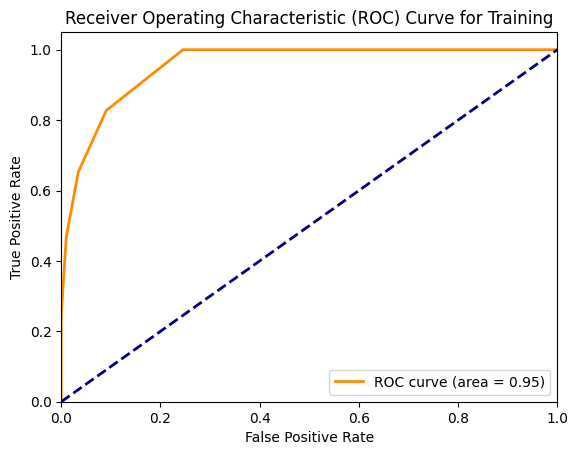

In [6]:
from process_bank_churn import count_and_plot_auroc
#  count_and_plot_auroc(model, inputs, targets, name='', plot=False) - –º–æ—è —Ñ—É–Ω–∫—Ü—ñ—è –¥–ª—è –≤—ñ–∑—É–∞–ª—ñ–∑–∞—Ü—ñ—ó –∑ –º–∏–Ω—É–ª–æ–≥–æ –¥–∑, –¥–æ–¥–∞–ª–∞ —ó—ó –≤ process_bank_churn –¥–ª—è –∑—Ä—É—á–Ω–æ—Å—Ç—ñ –ø–µ—Ä–µ–≤–∏–∫–æ—Ä–∏—Å—Ç–∞–Ω–Ω—è

count_and_plot_auroc(knn, X_train, train_targets, 'Training', plot=True)

AUROC for Validation: 0.85


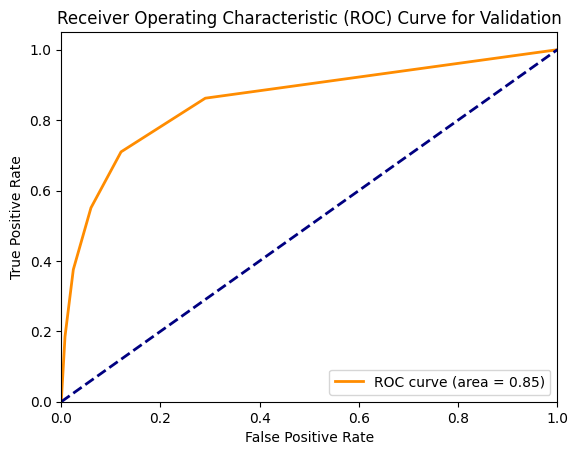

In [7]:
count_and_plot_auroc(knn, X_val, val_targets, 'Validation', plot=True)

–û—Ç—Ä–∏–º–∞–Ω–∞ –º–æ–¥–µ–ª—å –Ω–∞–±–∞–≥–∞—Ç–æ –∫—Ä–∞—â–µ –ø–æ–∫–∞–∑—É—î —Å–µ–±–µ –Ω–∞ —Ç–µ—Å—Ç–æ–≤–∏—Ö –¥–∞–Ω–∏—Ö –≤ –ø–æ—Ä—ñ–≤–Ω—è–Ω–Ω—ñ –∑ –≤–∞–ª—ñ–¥–∞—Ü—ñ–π–Ω–∏–º–∏, —â–æ —Å–≤—ñ–¥—á–∏—Ç—å –ø—Ä–æ –ø–µ—Ä–µ–Ω–∞–≤—á–∞–Ω–Ω—è

2. –í–∏–∫–æ—Ä–∏—Å—Ç–æ–≤—É—é—á–∏ `GridSearchCV` –∑–Ω–∞–π–¥—ñ—Ç—å –æ–ø—Ç–∏–º–∞–ª—å–Ω–µ –∑–Ω–∞—á–µ–Ω–Ω—è –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ `n_neighbors` –¥–ª—è –∫–ª–∞—Å–∏—Ñ—ñ–∫–∞—Ç–æ—Ä–∞ `kNN`. –ü—Å–æ—Ç–∞–≤—Ç–µ –∫—Ä–æ—Å –≤–∞–ª—ñ–¥–∞—Ü—ñ—é –Ω–∞ 5 —Ñ–æ–ª–¥—ñ–≤.

  –ü—ñ—Å–ª—è —É—Å–ø—ñ—à–Ω–æ–≥–æ –∑–∞–≤–µ—Ä—à–µ–Ω–Ω—è –ø–æ—à—É–∫—É –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ–≥–æ –≥—ñ–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–∞
    - –≤–∏–≤–µ–¥—ñ—Ç—å –Ω–∞–π–∫—Ä–∞—â–µ –∑–Ω–∞—á–µ–Ω–Ω—è –ø–∞—Ä–∞–º–µ—Ç—Ä–∞
    - –∑–±–µ—Ä–µ–∂—ñ—Ç—å –≤ –æ–∫—Ä–µ–º—É –∑–º—ñ–Ω–Ω—É `knn_best` –Ω–∞–π–∫—Ä–∞—â—É –º–æ–¥–µ–ª—å, –∑–Ω–∞–π–¥–µ–Ω—É –∑ `GridSearchCV`
    - –æ—Ü—ñ–Ω—ñ—Ç—å —è–∫—ñ—Å—Ç—å –ø–µ—Ä–µ–¥–±–∞—á–µ–Ω—å  `knn_best` –Ω–∞ —Ç—Ä–µ–Ω—É–≤–∞–ª—å–Ω—ñ–π —ñ –≤–∞–ª—ñ–¥–∞—Ü—ñ–π–Ω—ñ–π –≤–∏–±—ñ—Ä—Ü—ñ –∑ –¥–æ–ø–æ–º–æ–≥–æ—é AUROC.
    - –∑—Ä–æ–±—ñ—Ç—å –≤–∏—Å–Ω–æ–≤–æ–∫ –ø—Ä–æ —è–∫—ñ—Å—Ç—å –º–æ–¥–µ–ª—ñ. –ß–∏ —Å—Ç–∞–ª–∞ –≤–æ–Ω–∞ –∫—Ä–∞—â–µ –ø–æ—Ä—ñ–≤–Ω—è–Ω–æ –∑ –ø–æ–ø–µ—Ä–µ–¥–Ω—ñ–º –ø—É–∫–Ω—Ç–æ–º (2) —Ü—å–æ–≥–æ –∑–∞–≤–¥–∞–Ω–Ω—è? –ß–∏ —î –≤–æ–Ω–∞ –∫—Ä–∞—â–µ –∑–∞ –¥–µ—Ä–µ–≤–æ –ø—Ä–∏–π–Ω—è—Ç—Ç—è —Ä—ñ—à–µ–Ω—å –∑ –ø–æ–ø–µ—Ä–µ–¥–Ω—å–æ–≥–æ –î–ó?

In [8]:
knn_model = KNeighborsClassifier()
knn_params = {'n_neighbors': np.arange(1, 25)}
knn_grid = GridSearchCV(knn_model, knn_params, cv=5, n_jobs=5)
knn_grid.fit(X_train, train_targets)

knn_best = knn_grid.best_estimator_

print(knn_grid.best_params_, knn_grid.best_score_)


{'n_neighbors': 9} 0.86725


In [9]:
count_and_plot_auroc(knn_best, X_train, train_targets, 'Training')

AUROC for Training: 0.94


In [10]:
count_and_plot_auroc(knn_best, X_val, val_targets, 'Validation')


AUROC for Validation: 0.87


–û—Ç—Ä–∏–º–∞–Ω–∞ –ø–æ—à—É–∫–æ–º —Å—ñ—Ç–∫–æ—é –º–æ–¥–µ–ª—å —Ç—Ä–æ—Ö–∏ –∫—Ä–∞—â–µ –ø–æ–∫–∞–∑—É—î —Å–µ–±–µ –Ω–∞ –≤–∞–ª—ñ–¥–∞—Ü—ñ–π–Ω–∏—Ö –¥–∞–Ω–∏—Ö, –ø—Ä–æ—Ç–µ –≤—Å–µ–æ–¥–Ω–æ —î –ø–µ—Ä–µ–Ω–∞–≤—á–µ–Ω–æ—é —ñ –¥–∞—î —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∏ –∑–Ω–∞—á–Ω–æ –≥—ñ—Ä—à—ñ –∑–∞ –¥–µ—Ä–µ–≤–æ –ø—Ä–∏–π–Ω—è—Ç—Ç—è —Ä—ñ—à–µ–Ω—å –∑ –º–∏–Ω—É–ª–æ–≥–æ –¥–∑(0.93 train, 0.92 val)

3. –í–∏–∫–æ–Ω–∞–π—Ç–µ –ø–æ—à—É–∫ –æ–ø—Ç–∏–º–∞–ª—å–Ω–∏—Ö –≥—ñ–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ñ–≤ –¥–ª—è `DecisionTreeClassifier` –∑ `GridSearchCV` –∑–∞ —Å—ñ—Ç–∫–æ—é –ø–∞—Ä–∞–º–µ—Ç—Ä—ñ–≤
  - `max_depth` –≤—ñ–¥ 1 –¥–æ 20 –∑ –∫—Ä–æ–∫–æ–º 2
  - `max_leaf_nodes` –≤—ñ–¥ 2 –¥–æ 10 –∑ –∫—Ä–æ–∫–æ–º 1

  –û–±–æ–≤ º—è–∑–∫–æ–≤–æ –ø—Ä–∏ —Ü—å–æ–º—É —ñ–Ω—ñ—Ü—ñ—é–π—Ç–µ –º–æ–¥–µ–ª—å –∑ —Ñ—ñ–∫—Å–∞—Ü—ñ—î—é `random_seed`.

  –ü–æ—Å—Ç–∞–≤—Ç–µ –∫—Ä–æ—Å–≤–∞–ª—ñ–¥–∞—Ü—ñ—é –Ω–∞ 3 —Ñ–æ–ª–¥–∏, `scoring='roc_auc'`, —Ç–∞ –≤–∏–º—ñ—Ä—è–π—Ç–µ, —Å–∫—ñ–ª—å–∫–∏ —á–∞—Å—É –ø–æ—Ç—Ä–µ–±—É—î –ø–æ—à—É–∫ –æ–ø—Ç–∏–º–∞–ª—å–Ω–∏—Ö –≥—ñ–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ñ–≤.

  –ü—ñ—Å–ª—è —É—Å–ø—ñ—à–Ω–æ–≥–æ –∑–∞–≤–µ—Ä—à–µ–Ω–Ω—è –ø–æ—à—É–∫—É –æ–ø—Ç–∏–º–∞–ª—å–Ω–∏—Ö –≥—ñ–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ñ–≤
    - –≤–∏–≤–µ–¥—ñ—Ç—å –Ω–∞–π–∫—Ä–∞—â—ñ –∑–Ω–∞—á–µ–Ω–Ω—è –ø–∞—Ä–∞–º–µ—Ç—Ä–∞
    - –∑–±–µ—Ä–µ–∂—ñ—Ç—å –≤ –æ–∫—Ä–µ–º—É –∑–º—ñ–Ω–Ω—É `dt_best` –Ω–∞–π–∫—Ä–∞—â—É –º–æ–¥–µ–ª—å, –∑–Ω–∞–π–¥–µ–Ω—É –∑ `GridSearchCV`
    - –æ—Ü—ñ–Ω—ñ—Ç—å —è–∫—ñ—Å—Ç—å –ø–µ—Ä–µ–¥–±–∞—á–µ–Ω—å  `dt_best` –Ω–∞ —Ç—Ä–µ–Ω—É–≤–∞–ª—å–Ω—ñ–π —ñ –≤–∞–ª—ñ–¥–∞—Ü—ñ–π–Ω—ñ–π –≤–∏–±—ñ—Ä—Ü—ñ –∑ –¥–æ–ø–æ–º–æ–≥–æ—é AUROC.
    - –∑—Ä–æ–±—ñ—Ç—å –≤–∏—Å–Ω–æ–≤–æ–∫ –ø—Ä–æ —è–∫—ñ—Å—Ç—å –º–æ–¥–µ–ª—ñ. –ß–∏ —Ü—è –º–æ–¥–µ–ª—å –∫—Ä–∞—â–∞ –∑–∞ —Ç—É, —â–æ –≤–∏ –∑–Ω–∞–π—à–ª–∏ –≤—Ä—É—á–Ω—É?

In [14]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(random_state=42)
tree_params = {'max_depth': np.arange(1, 20, 2),
               'max_leaf_nodes': np.arange(2, 10)}
tree_grid = GridSearchCV(tree_model, tree_params, cv = 3, scoring='roc_auc', n_jobs=5)

In [19]:
%%time
tree_grid.fit(X_train, train_targets)

CPU times: total: 234 ms
Wall time: 714 ms


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42), n_jobs=5,
             param_grid={'max_depth': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                         'max_leaf_nodes': array([2, 3, 4, 5, 6, 7, 8, 9])},
             scoring='roc_auc')

In [42]:
dt_best = tree_grid.best_estimator_

tree_grid.best_params_

{'max_depth': 5, 'max_leaf_nodes': 9}

In [43]:
count_and_plot_auroc(dt_best, X_train, train_targets, 'Training')

AUROC for Training: 0.90


In [44]:
count_and_plot_auroc(dt_best, X_val, val_targets, 'Validation')

AUROC for Validation: 0.89


–ú–æ–¥–µ–ª—å –∑—ñ –∑–Ω–∞–π–¥–µ–Ω–∏–º–∏ –≤—Ä—É—á–Ω—É –≤ –º–∏–Ω—É–ª–æ–º—É –¥–∑ –∑ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏ `max_leaf_nodes`=40, `max_depth`=6 –ø–æ–∫–∞–∑–∞–ª–∞ —Å–µ–±–µ –∫—Ä–∞—â–µ –æ—Ç—Ä–∏–º–∞–Ω–æ—ó –ø–æ—à—É–∫–º–æ–º –ø–æ —Å—ñ—Ç—Ü—ñ(0.93 –Ω–∞ —Ç—Ä–µ–Ω—Ü–≤–∞–ª—å–Ω–∏—Ö —Ç–∞ 0.92 –Ω–∞ –≤–∞–ª. –¥–∞–Ω–∏—Ö), –∞–¥–∂–µ GridSearch —ñ–∑ –∑–Ω–∞—á–µ–Ω–Ω—è–º–∏ –¥–æ 40 –±—É–≤ –±–∏ –¥—É–∂–µ —Ä–µ—Å—É—Ä—Å–æ–∑–∞—Ç—Ä–∞—Ç–Ω–∏–º

4. –í–∏–∫–æ–Ω–∞–π—Ç–µ –ø–æ—à—É–∫ –æ–ø—Ç–∏–º–∞–ª—å–Ω–∏—Ö –≥—ñ–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ñ–≤ –¥–ª—è `DecisionTreeClassifier` –∑ `RandomizedSearchCV` –∑–∞ –∑–∞–¥–∞–Ω–æ—é —Å—ñ—Ç–∫–æ—é –ø–∞—Ä–∞–º–µ—Ç—Ä—ñ–≤ —ñ –∫—ñ–ª—å–∫—ñ—Å—Ç—å —ñ—Ç–µ—Ä–∞—Ü—ñ–π 40.

  –ü–æ—Å—Ç–∞–≤—Ç–µ –∫—Ä–æ—Å–≤–∞–ª—ñ–¥–∞—Ü—ñ—é –Ω–∞ 3 —Ñ–æ–ª–¥–∏, `scoring='roc_auc'`, –∑–∞—Ñ—ñ–∫—Å—É–π—Ç–µ `random_seed` –ø—Ä–æ—Ü–µ–¥—É—Ä–∏ –∫—Ä–æ—Å –≤–∞–ª—ñ–¥–∞—Ü—ñ—ó —Ç–∞ –≤–∏–º—ñ—Ä—è–π—Ç–µ, —Å–∫—ñ–ª—å–∫–∏ —á–∞—Å—É –ø–æ—Ç—Ä–µ–±—É—î –ø–æ—à—É–∫ –æ–ø—Ç–∏–º–∞–ª—å–Ω–∏—Ö –≥—ñ–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ñ–≤.

  –ü—ñ—Å–ª—è —É—Å–ø—ñ—à–Ω–æ–≥–æ –∑–∞–≤–µ—Ä—à–µ–Ω–Ω—è –ø–æ—à—É–∫—É –æ–ø—Ç–∏–º–∞–ª—å–Ω–∏—Ö –≥—ñ–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ñ–≤
    - –≤–∏–≤–µ–¥—ñ—Ç—å –Ω–∞–π–∫—Ä–∞—â—ñ –∑–Ω–∞—á–µ–Ω–Ω—è –ø–∞—Ä–∞–º–µ—Ç—Ä–∞
    - –∑–±–µ—Ä–µ–∂—ñ—Ç—å –≤ –æ–∫—Ä–µ–º—É –∑–º—ñ–Ω–Ω—É `dt_random_search_best` –Ω–∞–π–∫—Ä–∞—â—É –º–æ–¥–µ–ª—å, –∑–Ω–∞–π–¥–µ–Ω—É –∑ `RandomizedSearchCV`
    - –æ—Ü—ñ–Ω—ñ—Ç—å —è–∫—ñ—Å—Ç—å –ø–µ—Ä–µ–¥–±–∞—á–µ–Ω—å  `dt_random_search_best` –Ω–∞ —Ç—Ä–µ–Ω—É–≤–∞–ª—å–Ω—ñ–π —ñ –≤–∞–ª—ñ–¥–∞—Ü—ñ–π–Ω—ñ–π –≤–∏–±—ñ—Ä—Ü—ñ –∑ –¥–æ–ø–æ–º–æ–≥–æ—é AUROC.
    - –∑—Ä–æ–±—ñ—Ç—å –≤–∏—Å–Ω–æ–≤–æ–∫ –ø—Ä–æ —è–∫—ñ—Å—Ç—å –º–æ–¥–µ–ª—ñ. –ß–∏ —Ü—è –º–æ–¥–µ–ª—å –∫—Ä–∞—â–∞ –∑–∞ —Ç—É, —â–æ –≤–∏ –∑–Ω–∞–π—à–ª–∏ –∑ `GridSearch`?
    - –ø—Ä–æ–∞–Ω–∞–ª—ñ–∑—É–π—Ç–µ –ø–∞—Ä–∞–º–µ—Ç—Ä–∏ `dt_random_search_best` —ñ –ø–æ—Ä—ñ–≤–Ω—è–π—Ç–µ –∑ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏ `dt_best` - —è–∫—É –±–∞—á–∏—Ç–µ –≤—ñ–¥–º—ñ–Ω–Ω—ñ—Å—Ç—å? –¶—è –≤–ø—Ä–∞–≤–∞ –ø–æ—Ç—Ä—ñ–±–Ω–∞ –∞–±–∏ –∑—Ä–æ–∑—É–º—ñ—Ç–∏, —è–∫ —Ä—ñ–∑–Ω—ñ –Ω–∞–ª–∞—à—Ç—É–≤–∞–Ω–Ω—è `DecisionTreeClassifier` –≤–ø–ª–∏–≤–∞—é—Ç—å –Ω–∞ —è–∫—ñ—Å—Ç—å –º–æ–¥–µ–ª—ñ.

In [32]:
from sklearn.model_selection import RandomizedSearchCV

params_dt = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': np.arange(1, 20),
    # 'max_leaf_nodes': np.arange(2, 20),
    'max_leaf_nodes': np.arange(2, 60),
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': [None, 'sqrt', 'log2']
}


dt_random = RandomizedSearchCV(tree_model, params_dt, scoring='roc_auc', random_state=42, cv=3, n_jobs=5, n_iter=40)

In [33]:
%%time
dt_random.fit(X_train, train_targets)

CPU times: total: 188 ms
Wall time: 314 ms


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=40, n_jobs=5,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                                        'max_features': [None, 'sqrt', 'log2'],
                                        'max_leaf_nodes': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58, 59]),
                                        'min_samples_leaf': [1, 2, 4, 8],
                                        'min_samples_split': [2, 5, 10, 20],
                                        'splitter': ['best', 'random']},
                   random_state=42, scoring='roc_auc')

In [34]:
dt_random.best_params_

{'splitter': 'best',
 'min_samples_split': 20,
 'min_samples_leaf': 2,
 'max_leaf_nodes': 30,
 'max_features': None,
 'max_depth': 16,
 'criterion': 'entropy'}

In [30]:
dt_random_search_best = dt_random.best_estimator_

count_and_plot_auroc(dt_random_search_best, X_train, train_targets, 'Training')

AUROC for Training: 0.93


In [31]:
count_and_plot_auroc(dt_random_search_best, X_val, val_targets, 'Validation')


AUROC for Validation: 0.92


In [45]:
dt_best.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': 9,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 42,
 'splitter': 'best'}

In [36]:
dt_random.best_params_

{'splitter': 'best',
 'min_samples_split': 20,
 'min_samples_leaf': 2,
 'max_leaf_nodes': 30,
 'max_features': None,
 'max_depth': 16,
 'criterion': 'entropy'}

–û—Ç—Ä–∏–º–∞–Ω–∞ –º–æ–¥–µ–ª—å –¥–∞—î –∫—Ä–∞—â—ñ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∏ –Ω—ñ–∂ –º–æ–¥–µ–ª—å –∑ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏ –∑–Ω–∞–π–¥–µ–Ω–∏–º–∏ –∑–∞ –¥–æ–ø–æ–º–æ–≥–æ—é GridSearch.

–ó–Ω–∞—á–µ–Ω–Ω—è –ø–∞—Ä–∞–º–µ—Ç—Ä—ñ–≤ –º–æ–¥–µ–ª—ñ –∑ –ø–∞—Ä–∞–º–µ—Ä–∞–º–∏ RandomSearch –≤—ñ–¥—Ä—ñ–∑–Ω—è—é—Ç—å—Å—è –≤—ñ–¥ –ø–∞—Ä–∞–º–µ—Ç—Ä—ñ–≤ GridSerach, —Ç–∞–∫ —è–∫ –≤ –¥—Ä—É–≥–æ–º—É –≤–∏–ø–∞–¥–∫—É –≤–æ–Ω–∏ –≤–∑—è—Ç—ñ –∑–∞ –∑–∞–º–æ–≤—á—É–≤–∞–Ω–Ω—è–º, –≤ —Ç–æ–π —á–∞—Å —è–∫ RandomSearch –Ω–µ –ø–æ—Ç—Ä–µ–±—É—î –ø—Ä–æ—Ö–æ–¥–∂–µ–Ω–Ω—è –ø–æ –≤—Å—ñ–º—É –ø—Ä–æ—Å—Ç–æ—Ä—É –∑–Ω–∞—á–µ–Ω—å –ø–∞—Ä–∞–º–µ—Ä—ñ–≤ —ñ –¥–∞—î –º–æ–∂–ª–∏–≤—ñ—Å—å –≤–∏–∫–æ—Ä–∏—Å—Ç–∞—Ç–∏ –±—ñ–ª—å—à–µ —Ä—ñ–∑–Ω–æ–º–∞–Ω—ñ—Ç–Ω–∏—Ö –∑–Ω–∞—á–µ–Ω—å –¥–ª—è –ø–æ—à—É–∫—É –Ω–∞–π–∫—Ä–∞—â–∏—Ö.

–ó–Ω–∞—á–µ–Ω–Ω—è –ø–∞—Ä–∞–º–µ—Ç—Ä—ñ–≤ —â–æ –≤—ñ–¥—Ä—ñ–∑–Ω—è—é—Ç—å—Å—è:

* min_samples_split: 2/20
* min_samples_leaf: 1/2
* max_leaf_nodes: 9/30
* max_depth: 5/16
* criterion: gini/entropy

–û—Ç–∂–µ –≤–æ–Ω–∏ —î –≤–∞–∂–ª–∏–≤–∏–º–∏ –¥–ª—è —è–∫–æ—Å—Ç—ñ –º–æ–¥–µ–ª—ñ –¥–µ—Ä–µ–≤–∞ –ø—Ä–∏–π–Ω—è—Ç—Ç—è —Ä—ñ—à–µ–Ω—å

5. –Ø–∫—â–æ —É –í–∞—Å –≤–∏–π—à–ª–∞ –º–µ—Ç—Ä–∏–∫–∞ `AUROC` –≤ —Ü—ñ–π —Å–µ—Ä—ñ—ó –µ–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç—ñ–≤ - –∑—Ä–æ–±—ñ—Ç—å —â–µ –æ–¥–∏–Ω `submission` –Ω–∞ Kaggle —ñ –¥–æ–¥–∞–π—Ç–µ –∫–æ–¥ –¥–ª—è —Ü—å–æ–≥–æ —ñ —Å–∫—Ä—ñ–Ω—à–æ—Ç —Å–∫–æ—Ä–∞ –Ω–∞ –ø—É–±–ª—ñ—á–Ω–æ–º—É –ª—ñ–¥–µ—Ä–±–æ—Ä–¥—ñ –Ω–∏–∂—á–µ.

  –°–ø–æ–¥—ñ–≤–∞—é—Å—å –Ω–∞ —Ü—å–æ–º—É –µ—Ç–∞–ø—ñ –≤–∏ –≤–∂–µ –≤—ñ–¥—á—É–ª–∏ —Å–µ–±–µ —Å–ø—Ä–∞–≤–∂–Ω—ñ–º –¥–æ—Å–ª—ñ–¥–Ω–∏–∫–æ–º üòâ

In [44]:
from process_bank_churn import preprocess_new_data

test_df = pd.read_csv(test_dir, index_col='id')

X_test = preprocess_new_data(test_df.copy(), data['encoder'], data['scaler'])

sample_submission_dir = '../../../data/bank-customer-churn-prediction-dlu/sample_submission.csv'
submission = pd.read_csv(sample_submission_dir, index_col=0)

test_preds = dt_random_search_best.predict_proba(X_test)[:, 1]
submission['Exited'] = test_preds

submission.to_csv('../../../data/bank-customer-churn-prediction-dlu/submissions/submission_tree_randsearch.csv')


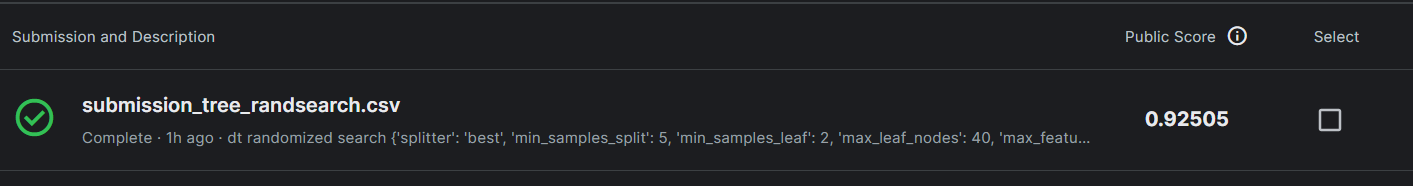